# Toronto and Vancouver Project Report

##  Introduction/Business Problem 

One friend currently lives in Toronto intends to move to Vancouver with an offer of new job. He is very happy with the current place he lives now - postcode area M6G (neighbourhood Christine) in Downtown Toronto, with many gocery stors, parks, and coffee shops around. 

He wants to know in Vancouver what are the post code areas have similar surroundings, so that he will be able to choose one of these post code areas where he can live with the similar comforts as he has in Downtown Toronto M6G, and at the same time, among those choices, to pick one post code area near to his new workplace.

The sitution of my fiends is very common in modern society. For various reasons, nowadays quite often people need to move from one place to another, could be to different cities, or different states or even different countries where they may not be familiar with. If they can see the comparability of the old place and potential new places in terms of surrounding venues, it will be very helpful for them to find the suitable new place similar to their current living place, so that they will be more comfortable to make that decision and move into the new place.

In the case of my friend, we get fetch the Foursquare location data with venue information like venue categories for different post code area of Toronto and Vancouver, and find the post code areas in Vancouver where have the similar venue categories like in Christine, i.e. with more grocery stores, coffess shops and parks nearby. Actually we can check the surrounding venue categories for any locations through Foursquare data, and it is possible we can do the comparison or grouping or clustering of any places, which can help people to make the right choice when they need to move from one place to another.

In this report, we will focus on the clustering of different post code areas of Toronto and Vancouver in terms of the frequency of their surrounding venue categories.

##  Data 

To do the analysis describles above, first of all we need the location data of both Toronto and Vancouver post code area. We can get three letter post codes and Borough and neighbourhood information via https://en.wikipedia.org/. Then we need to get the Latitude and Longitude information of those post code areas, which will be feeded into our fetch of Foursquare location data. 

Foursquare data have many types of location data for developers to access with, like searching different kinds of venue nearby like restaurant, cinema, etc, given a location, and access to Foursquare users' profile data and their commentary on the other location, or digging out more about one specific venue, like for one particular coffee shop, what is their special offer, people's comments on that coffee shop, or exploring trending venues around a given location, i.e. the venues with the highest foot traffic at the time, etc.

In our analysis, we will be sending the venue explore request request to Foursquare database. Venue exploring is a regular call to the API, and with free personal developer accounnt, we can make up to approximately 99 thousand regular calls per day. Venue explore will return the list of popular spots around the location. The information about those spots or venues will include venue id, name, its latitude, longitude, address, distance, location, photo, category and referral information, etc.

In our anaysis, we will extract the number of surrounding venues and venue category information by sending explore request to API for the postcode areas of both Tonoroto and Vancouver. With those data, we can then get the frequency of different venue categories occured nearby each postcode area of these two cities, and then try different algorithem to cluster those postcode areas into different group and find the similar postcode area as the postcode area M6G.


## Methodology


First of all, what we need to do is sending request to get the postcode and borough information from Wikipedia for where my friend live(M6G) and vancouver postcodes. Those information is in HTML format, by using Beautifulsoup, we are able to extract the table information of postcode. Then we use pgeocode to get the latitude and longtitude information for those postcode area we need cluster. Now then the clustering is based on the surrounding venue information, as we explained above, the aim for us is to find the similar postcode area like where my friends live M6G with similar venue surrounding like cafe and park. So we combined postcode M6G in Toronto and other postcode area in just Vancouver.

Then we send request to Foursquare database, to fetch for the venue information around those locations positioned with latitude and longtitude information. Foursquare sent back those venue information, among which we only need the number of venues for each location and the category of each venues, in order for us to do the clustering.

By looking at the number of venues for each location, we exclude those locations with less than 5 venues, as it does not really help much on determine the nature of of such location whether it is similar to others or not.

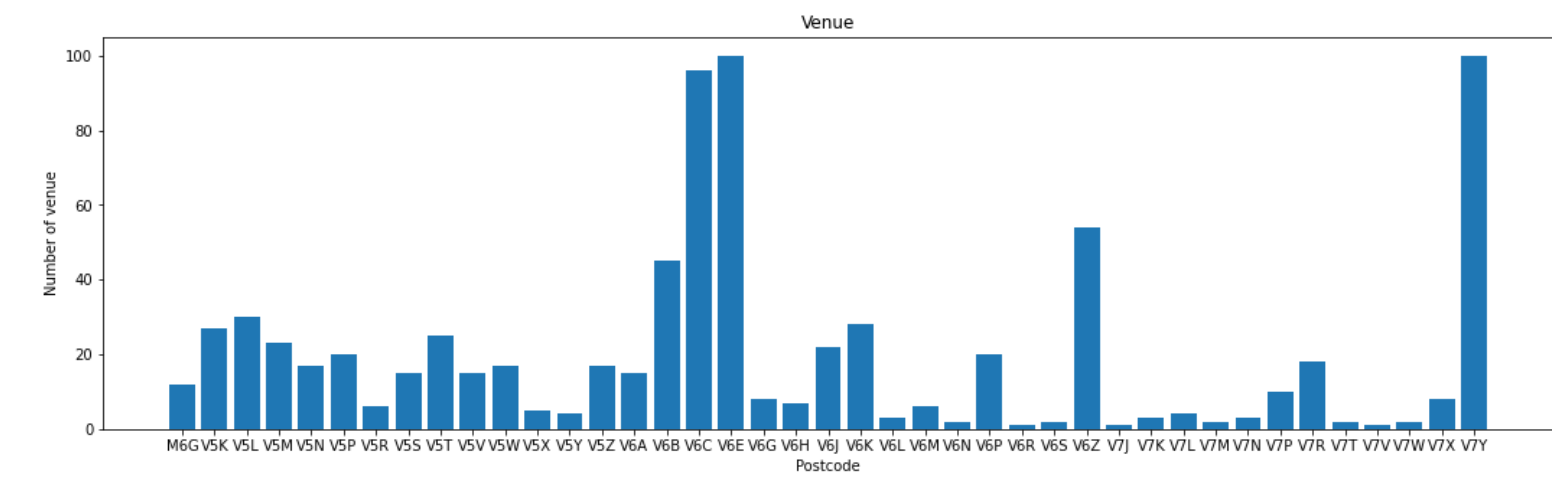

Now then we have datasets of 28 postcode areas, and there are 183 unique venue categories, meaning we have 183 features for those postcodes, it really is high dimenionsal datasets.

Then we get the frequency of each venue category happens for the location, by that we can also sort what are the most common venue exists around that location.

With all the data prepartion and processing above, we can start to do the clustering. In this project, we tried three method of unsurpervised clusting: Kmean, Hierachical and Dbscan, and here they all use Euclidean distance as distance calculation.


### Kmeans clustering
Kmeans is quite efficient clustering, and it needs pre-defined number of clusters. Basically it tries to minimize the sum of distance in each cluster to its central point, and the distance calculation often use Euclidean distance.

Depending on the difference choice of K, the mean distance of different datapoints to the centroid could be different, and also due to the random start of centroild, each run of Kmeans clustering may have different result. And Kmeans clustering assign all data points to one cluster even they do not belong to any.

Elbow method is a popular method to determine optimal number of K.It is just to perform K-means clustering with all these different values of K and for each K, we calculate average distances to the centroid across all data points, as K increases, less points in cluster, average distance to centroid decreases.

Below is the chart showing changing K, but due we only have 28 data points, we are not going to use k=10, but rather pick K=6 to see the results.

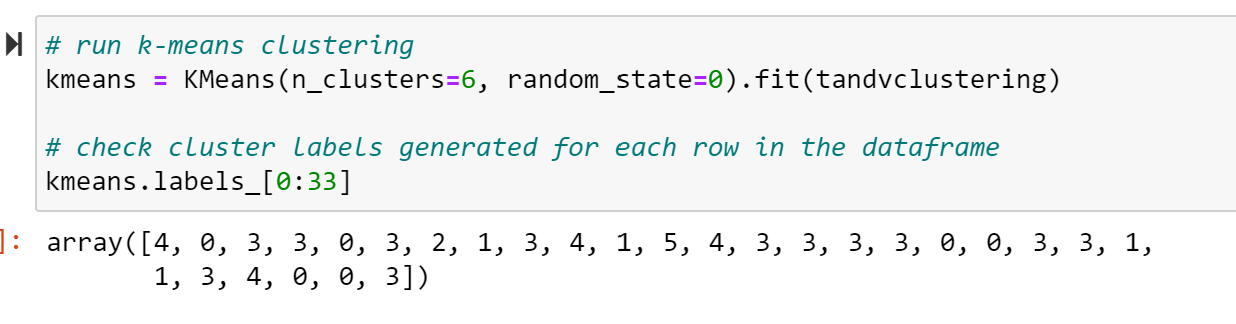


### Hierarchical clustering

Hierarchical clustering, we use agglomerative algorithm by beginning with ‘n’ clusters, and it merges the closet datapoints and keeps doing so untill the only single cluster remains. Therefore the amazing job it does is - it will always generate the same clustering result, and does not require pre-defined number of clusters. 

There are multiple ways to define the criteria of distance between clusters. Here we use Euclidean distance and default linkage is "ward" which minimizes the variance of the clusters being merged.

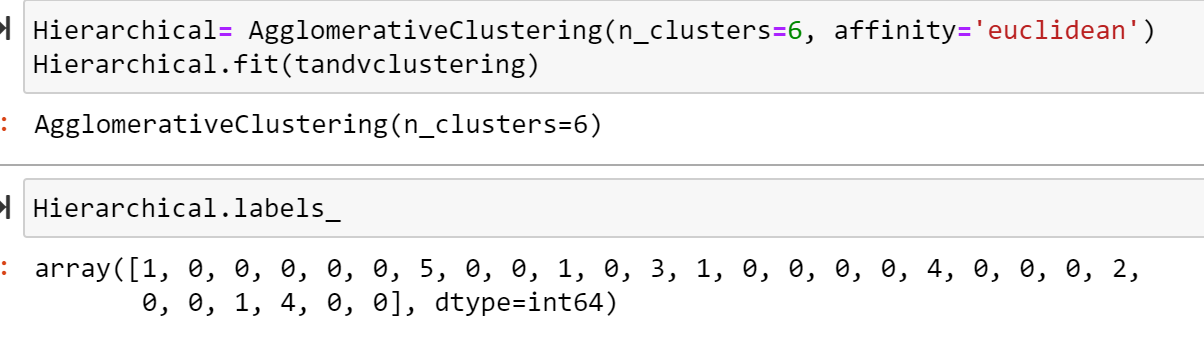

If the data set is big, Hierarchical clustering may take longer time, but given our dataset of 28*183, it is very quick. 


### Dbscan clustering

Density based clustering separates high density area from low density area. And density here is defined by mainly two parameters, Epsilon and Minium points. Epsilon is the radius within nearby data points that need to be in to be considered ‘similar’ enough to begin a cluster. Minimum Points is the minimum number of data points that need to be inside the radius (ie. epsilon) before they can be considered a cluster. It is very important to choose the parameter of epsilon and minPoints, and different choices may result in different clustering. Normally domain knowledge decides their value.

K-distnance graph can also help us to judget the value of epsilon.The point of maximum curvature (elbow method again) in this graph tells us about the value of epsilon. If the value of epsilon chosen is too small then a higher number of clusters will be created, and more data points will be taken as noise. Whereas, if chosen too big then various small clusters will merge into a big cluster, and we will lose details. Here we set Epsilon as 0.4.

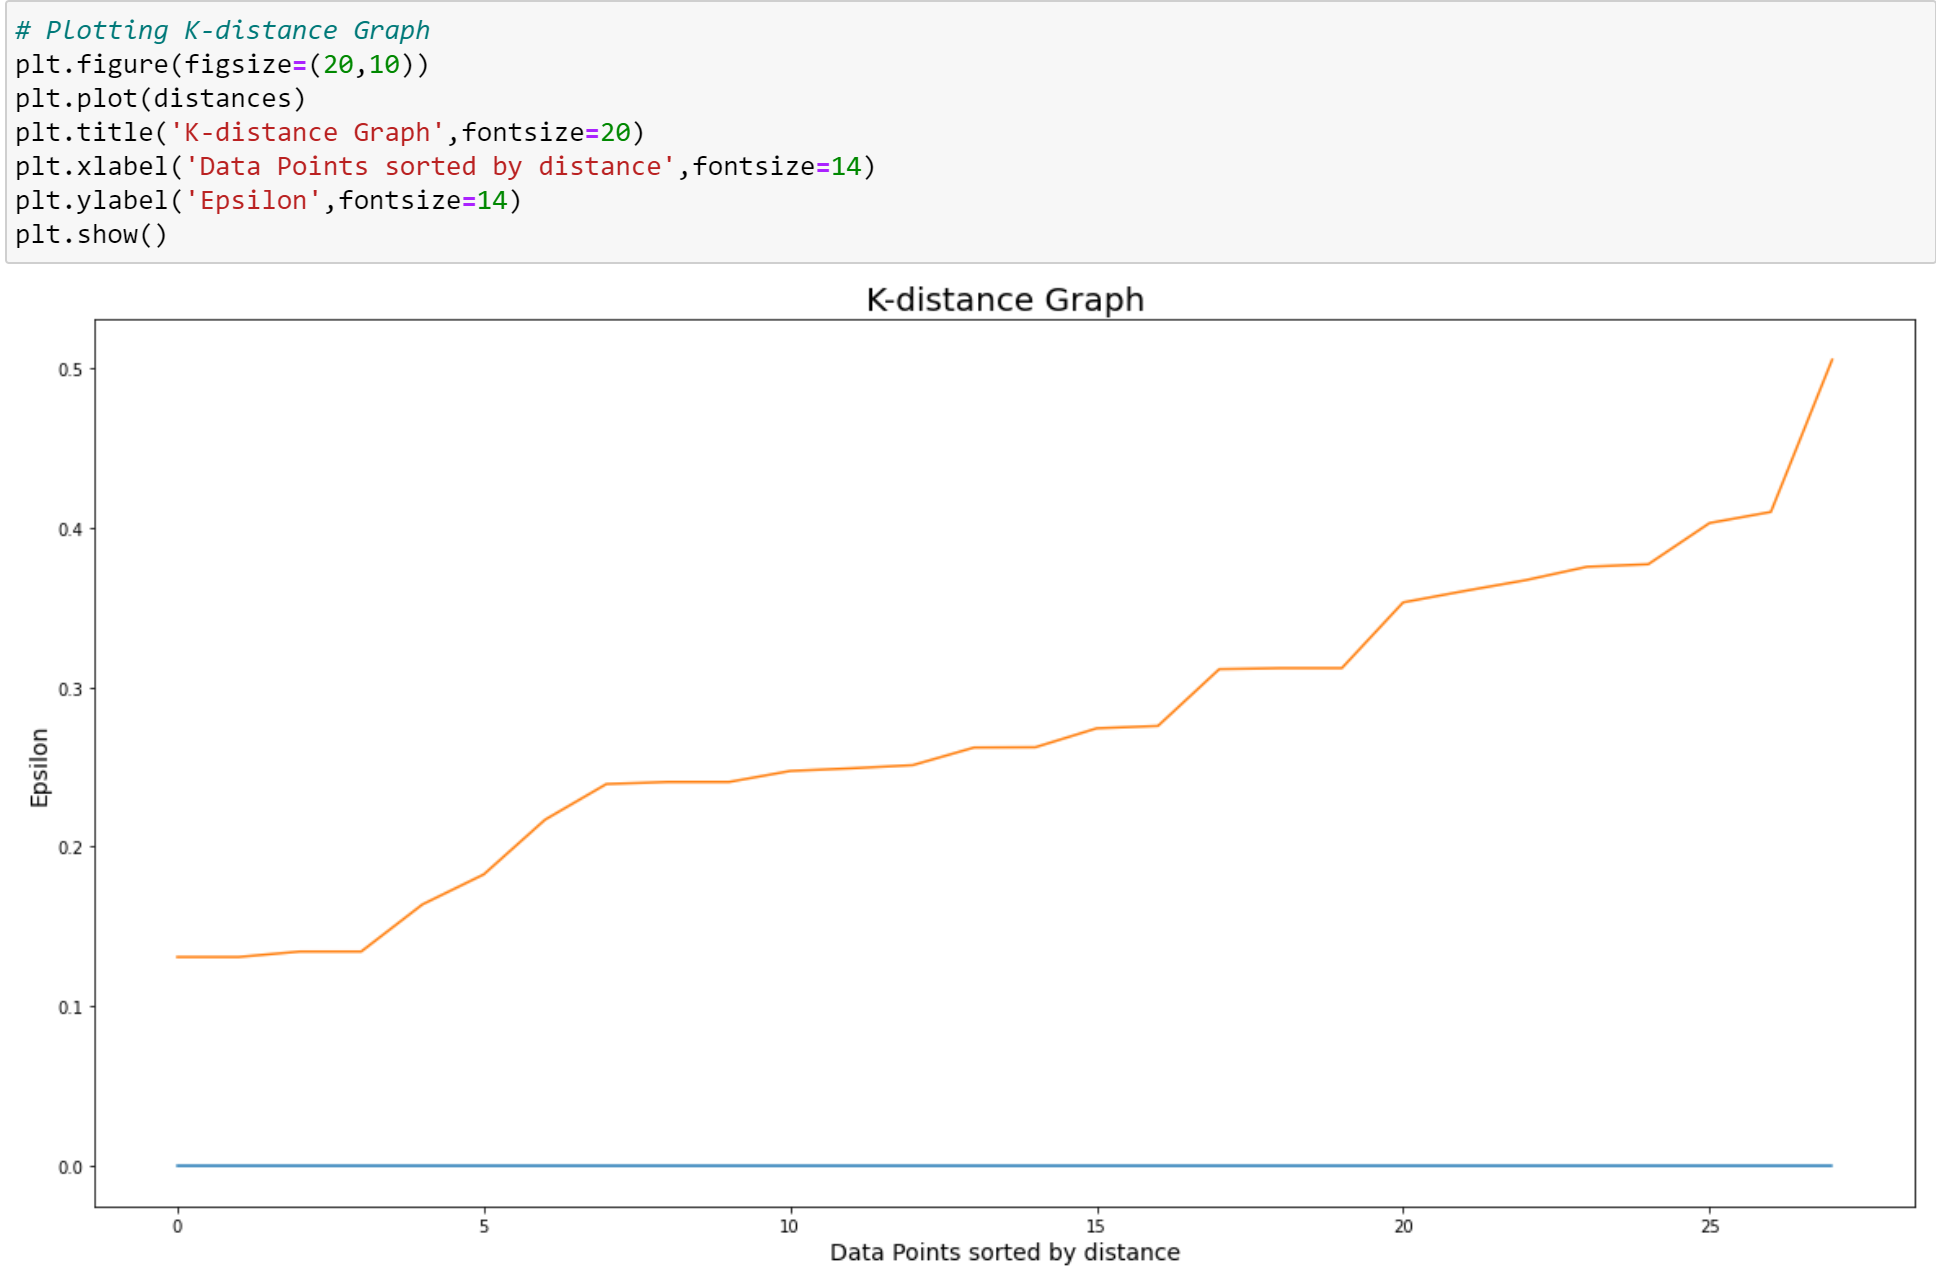

For minPoints we first tried 8. But the result run by algorithm clusters almost all into one cluster and leaves 3 data points as outliers.

Since normally the minPoints needs to be larger than the dataset dimension, the first try of our Dbscan method does not yield reasonable result, is it due to minPoints issue? Let's try again by reducing the dimension using PCA. By apply PCA algorithm, we find out of 183 features, atually around 8 features can already explains 80% of the variance.

Then we applies Bbscan again on these 8 features, but unfortunately, the result is still similar.

## Results

Both Kmeans and Hierarchical Clustering return simlar clustering results. If look at what the postcode areas in Vancouver are in the same cluster as M6G in Toronto - M6G in both methods is clustered with V5V, V5Z and V7P in Vancouver.

Results of Kmeans
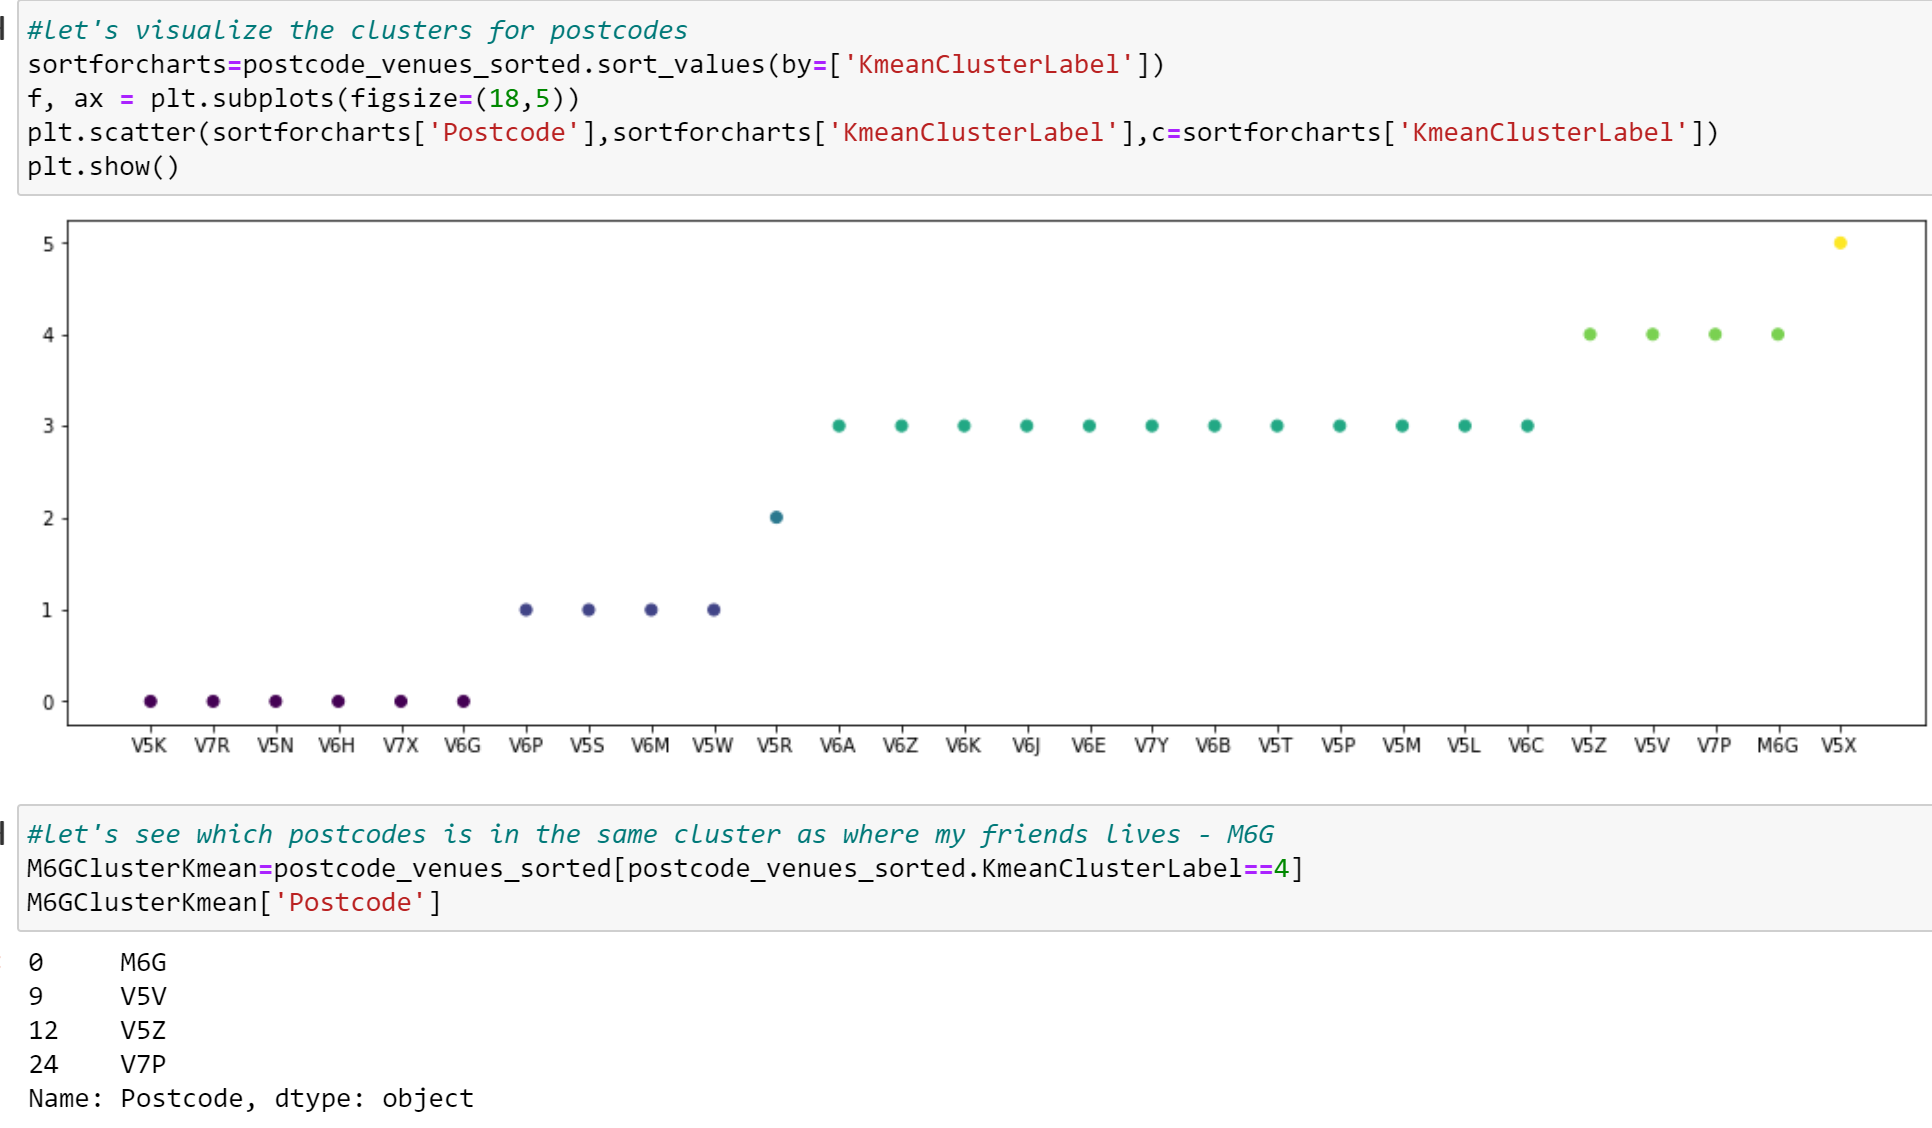

Results of hierarchical clustering.
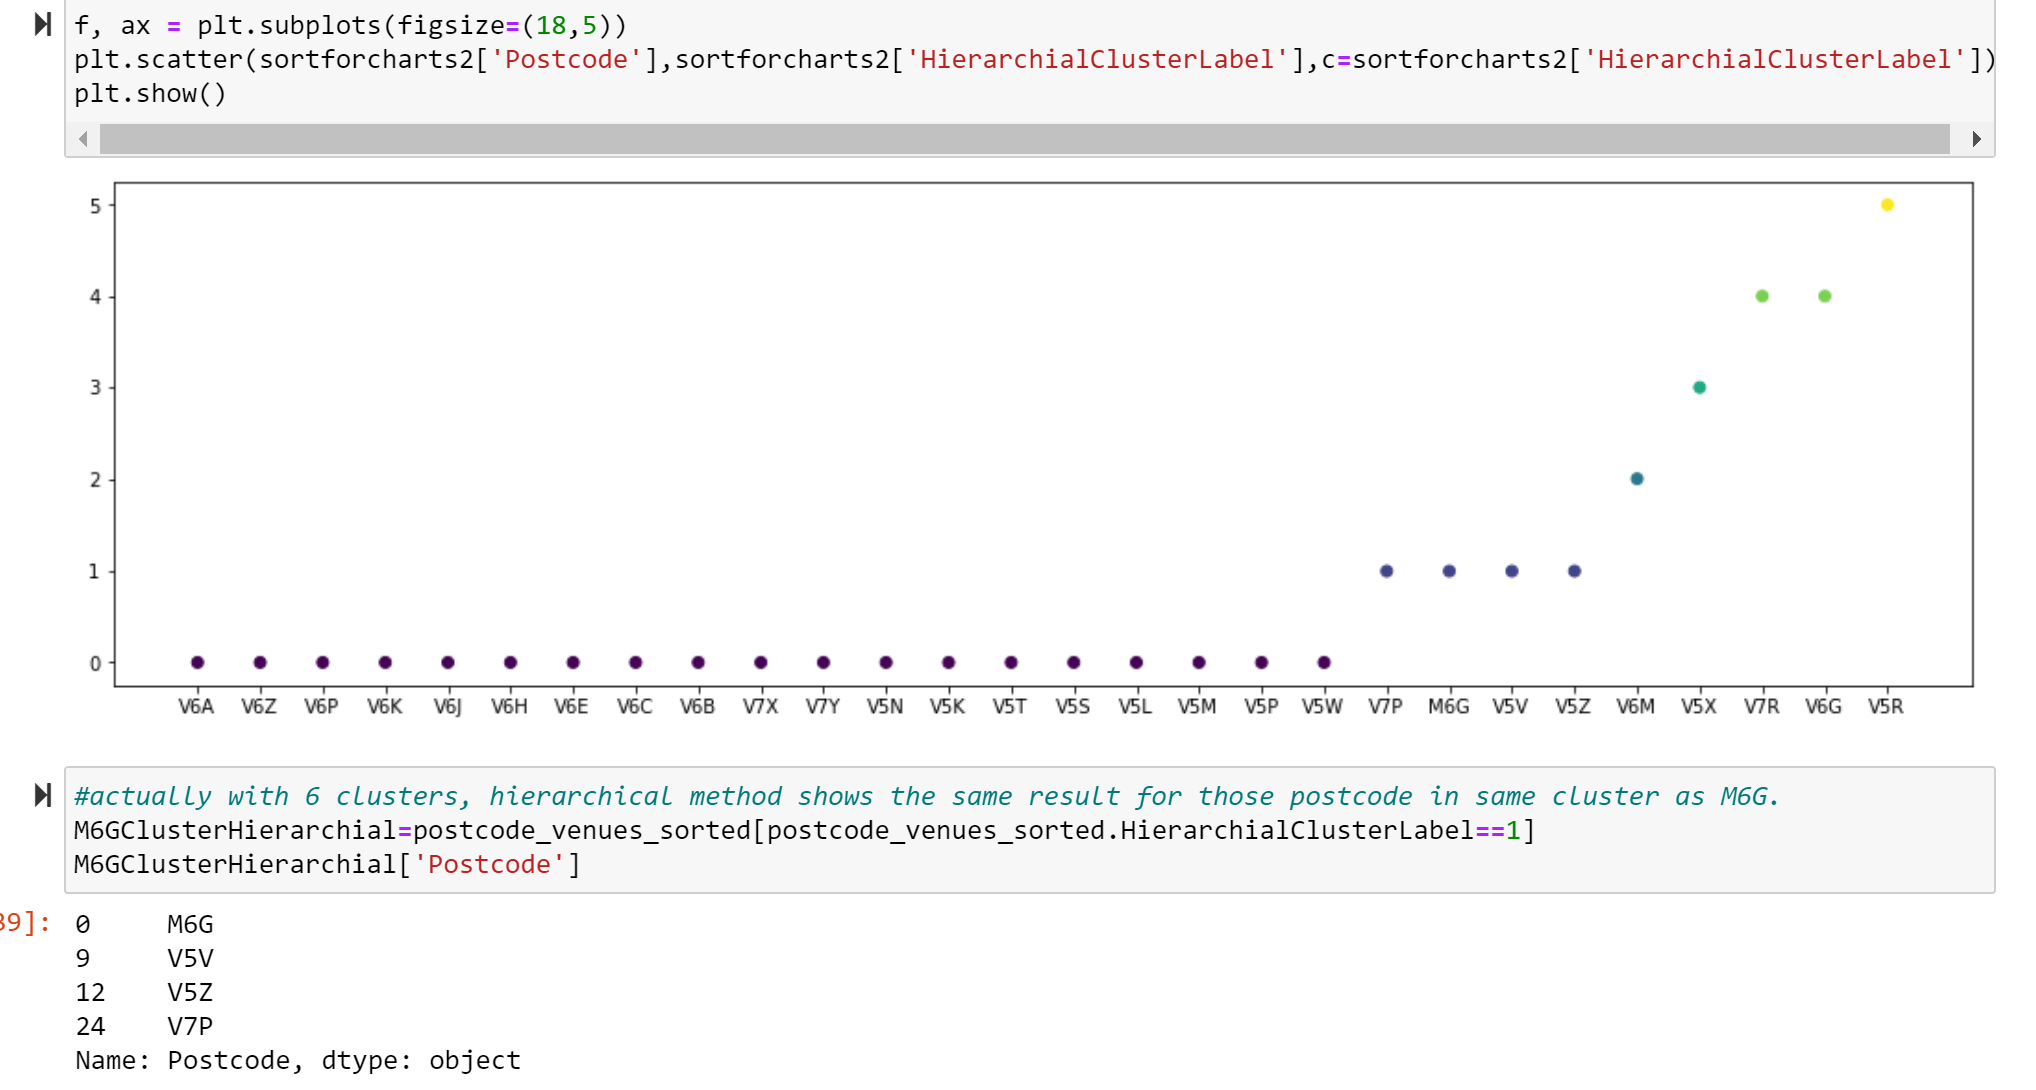

But Dbscan basically picks up 3 outliers and clusters the rest of postcode areas all into one cluster.

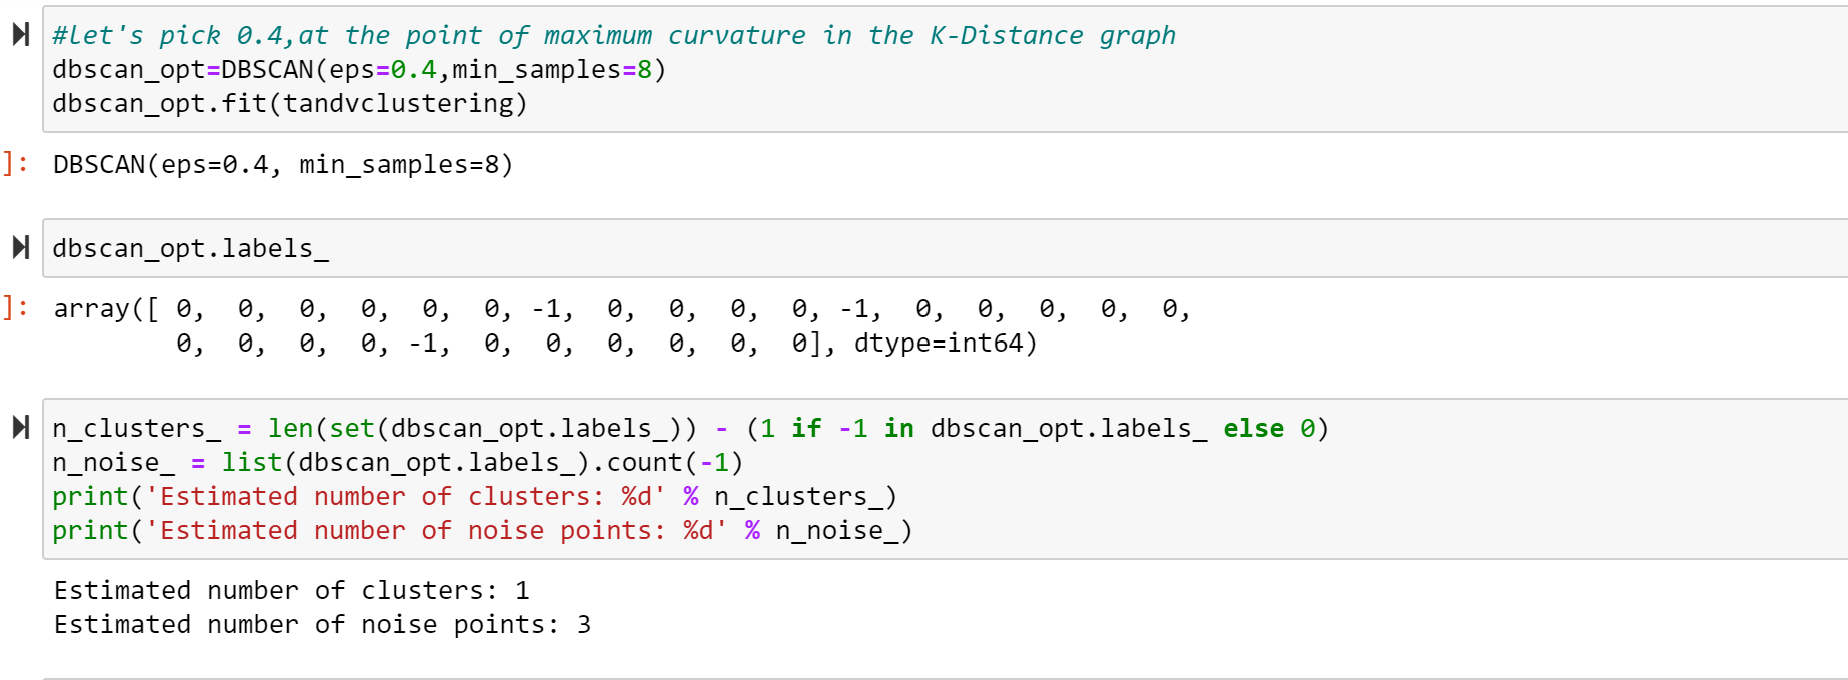

Below is the map showing the postcode areas clustered in Vancouver.

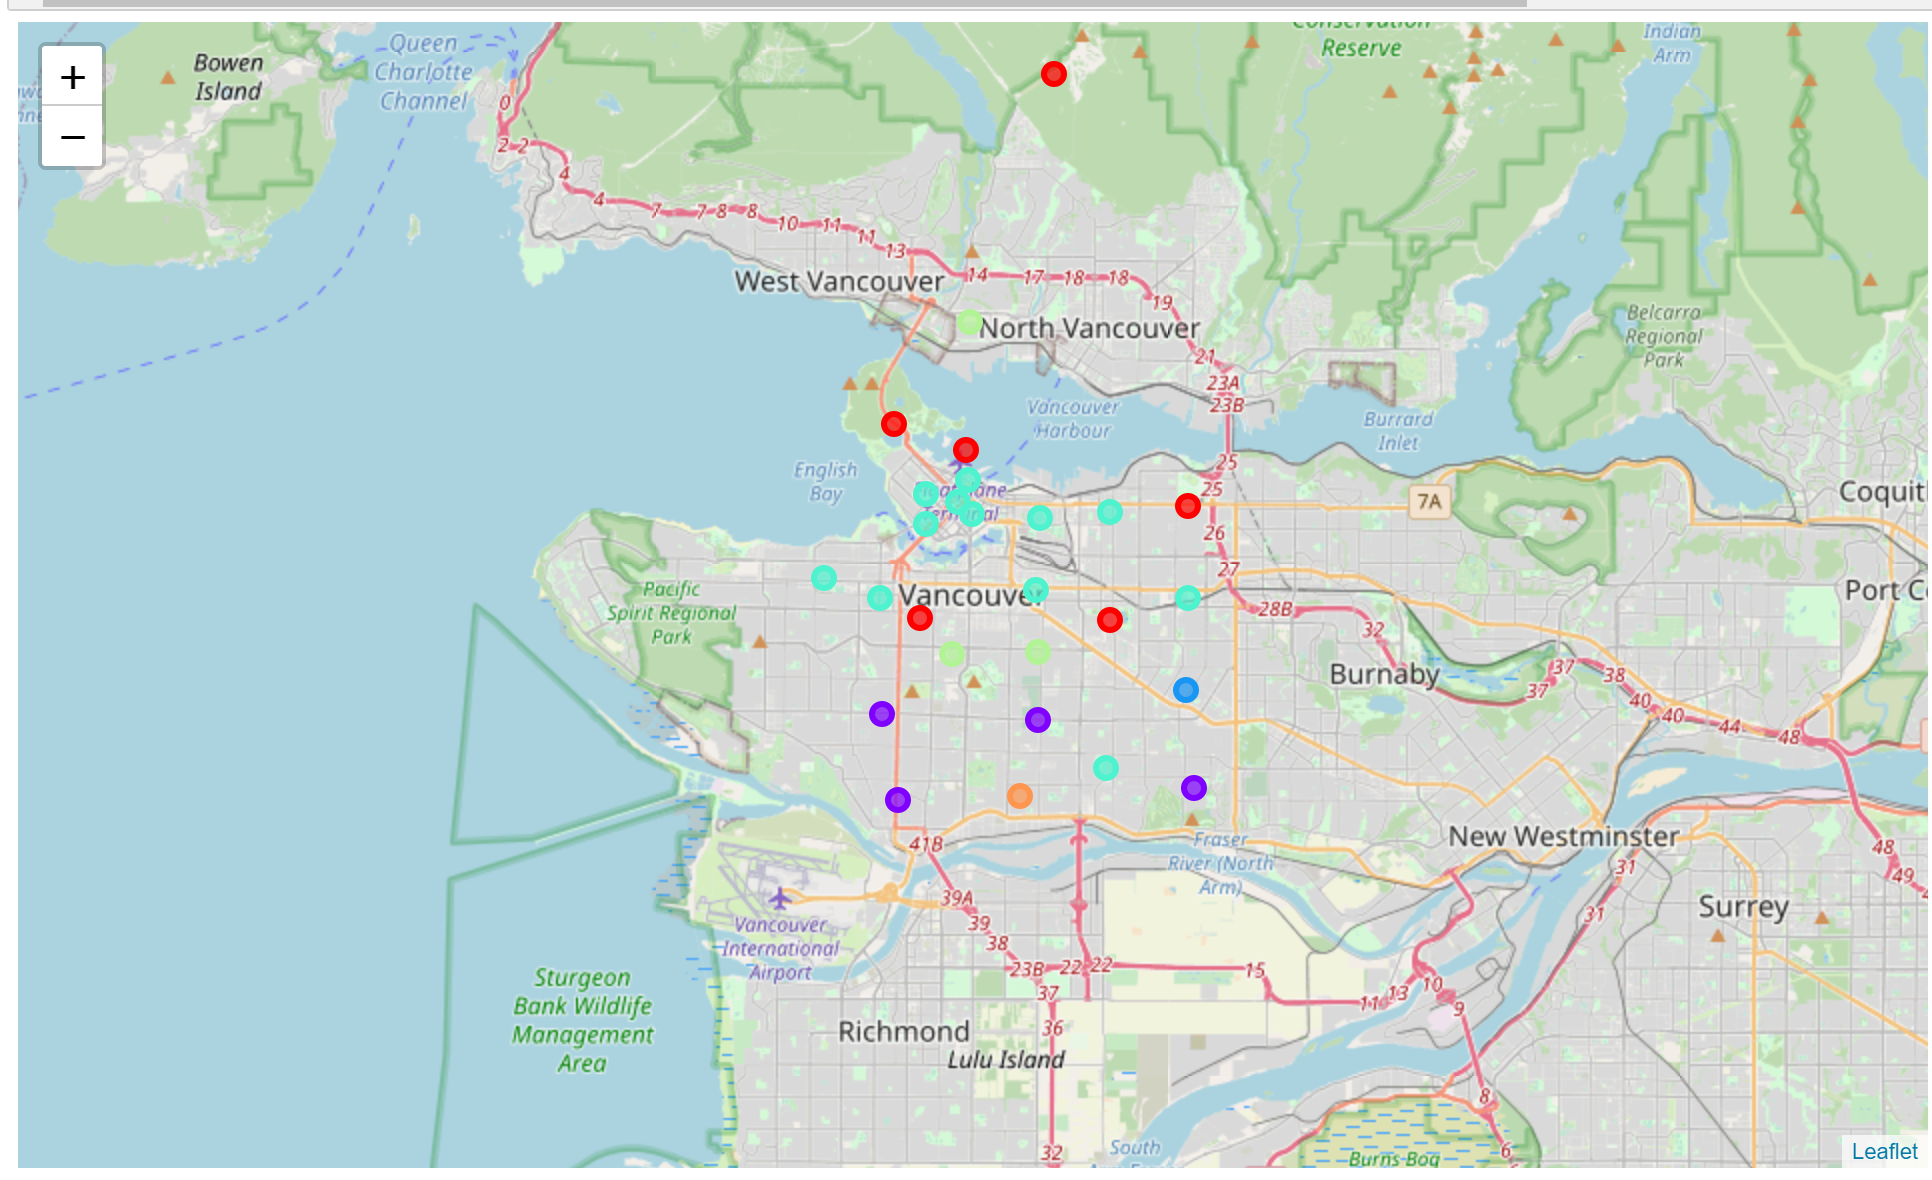



## Discussion

As we see in the results, Kmeans and Hierachical clustering generate similar results to find the similar postcodes area in Vancouver as Toronto area M6G. Both of them work well for this partiular datasets. But Kmeans and hierchial clustering do not work well for non-globular or non-spherical structured clusters.

Dbscan here basically clusters majority of the postcodes area into one cluster and points out 3 outliers. Looks like Dbscan does not work well for high dimension data, but even we reduced the dimension, Dbscan still does not cluster properly, that is due to Dbscan has difficulty to cluster with similar densities.

Interestingly Dbscan is outliering V5R, V5X and V6M three areas as outliers (DBSCAN clustering is robust to outliers), and Hierachical and Kmeans clustering is actually put these three postcode areas as single culster for each, as these two algorithm assign all the data points to clusters.




## Conclusion

We used three types of algorithms in finding the postcode areas in Vancouveer which belong to the same cluster as the postcode area where my friend currently live, Toronto M6G. Kmeans and Hierachical clustering generate similar result but Dbscan does not work very well for this dataset.

Different clustering algorithm uses different methodology like Kmeans is a least-squares optimization, while DBSCAN finds density-connected regions. They all have pros and cons. Which algorithm to use depends on the nature, size and shapes of the datasets. Of course the domain knowledge also helps us to choose the right algorithm and choose the right parameters for those algorithms. 
